In [64]:
from bankingSystem import * 
from helperFunctions import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings 
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
%pylab inline 
pylab.rcParams['figure.figsize'] = (20, 20)
pylab.rcParams['font.size'] = 20

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [67]:
# simulation and data collection
simulationSteps = 500
cMatrix = np.ones((100,100))*0.8
np.fill_diagonal(cMatrix, 1)
model = bankingSystem(banksFile="balanceSheetAnalysis/banksData_2022.csv", # csv file used to initialize the bank agents
                leverageRatio = 20.0,                                     # leverage ratio upper bound for all banks
                depositReserve = 0.2,                                     # capital reserve as a ratio of portfolio value
                num_borrowing= 20,                                        # number of borrowing request per bank per step
                sizeOfBorrowing = 1.0,                                      # size of borrowing as a ratio of equity capital
                num_banks=100,                                            # number of banks in the system 
                alpha = 0.5,                                              # portfolio recovery rate                           
                beta = 0.9,                                               # interbank loan recovery rate
                fedRate = 0.04,                                            # interest rate on borrowing   
                portfolioReturnRate = 0.10,          
                # return rate on portfolio
                returnVolatiliy = 0.18,
                returnCorrelation = cMatrix,
                liquidityShockNum = 10,                                    # number of liquidity shocks per step      
                shockSize = 0.5,                                          # size of the shock
                shockDuration = [300, 310]) # duration of the shock
                
model.datacollector.collect(model)
for i in tqdm(range(simulationSteps)):
    model.simulate()
    
agent_data = model.datacollector.get_agent_vars_dataframe()
model_data = model.datacollector.get_model_vars_dataframe()

100%|██████████| 500/500 [00:41<00:00, 11.98it/s]


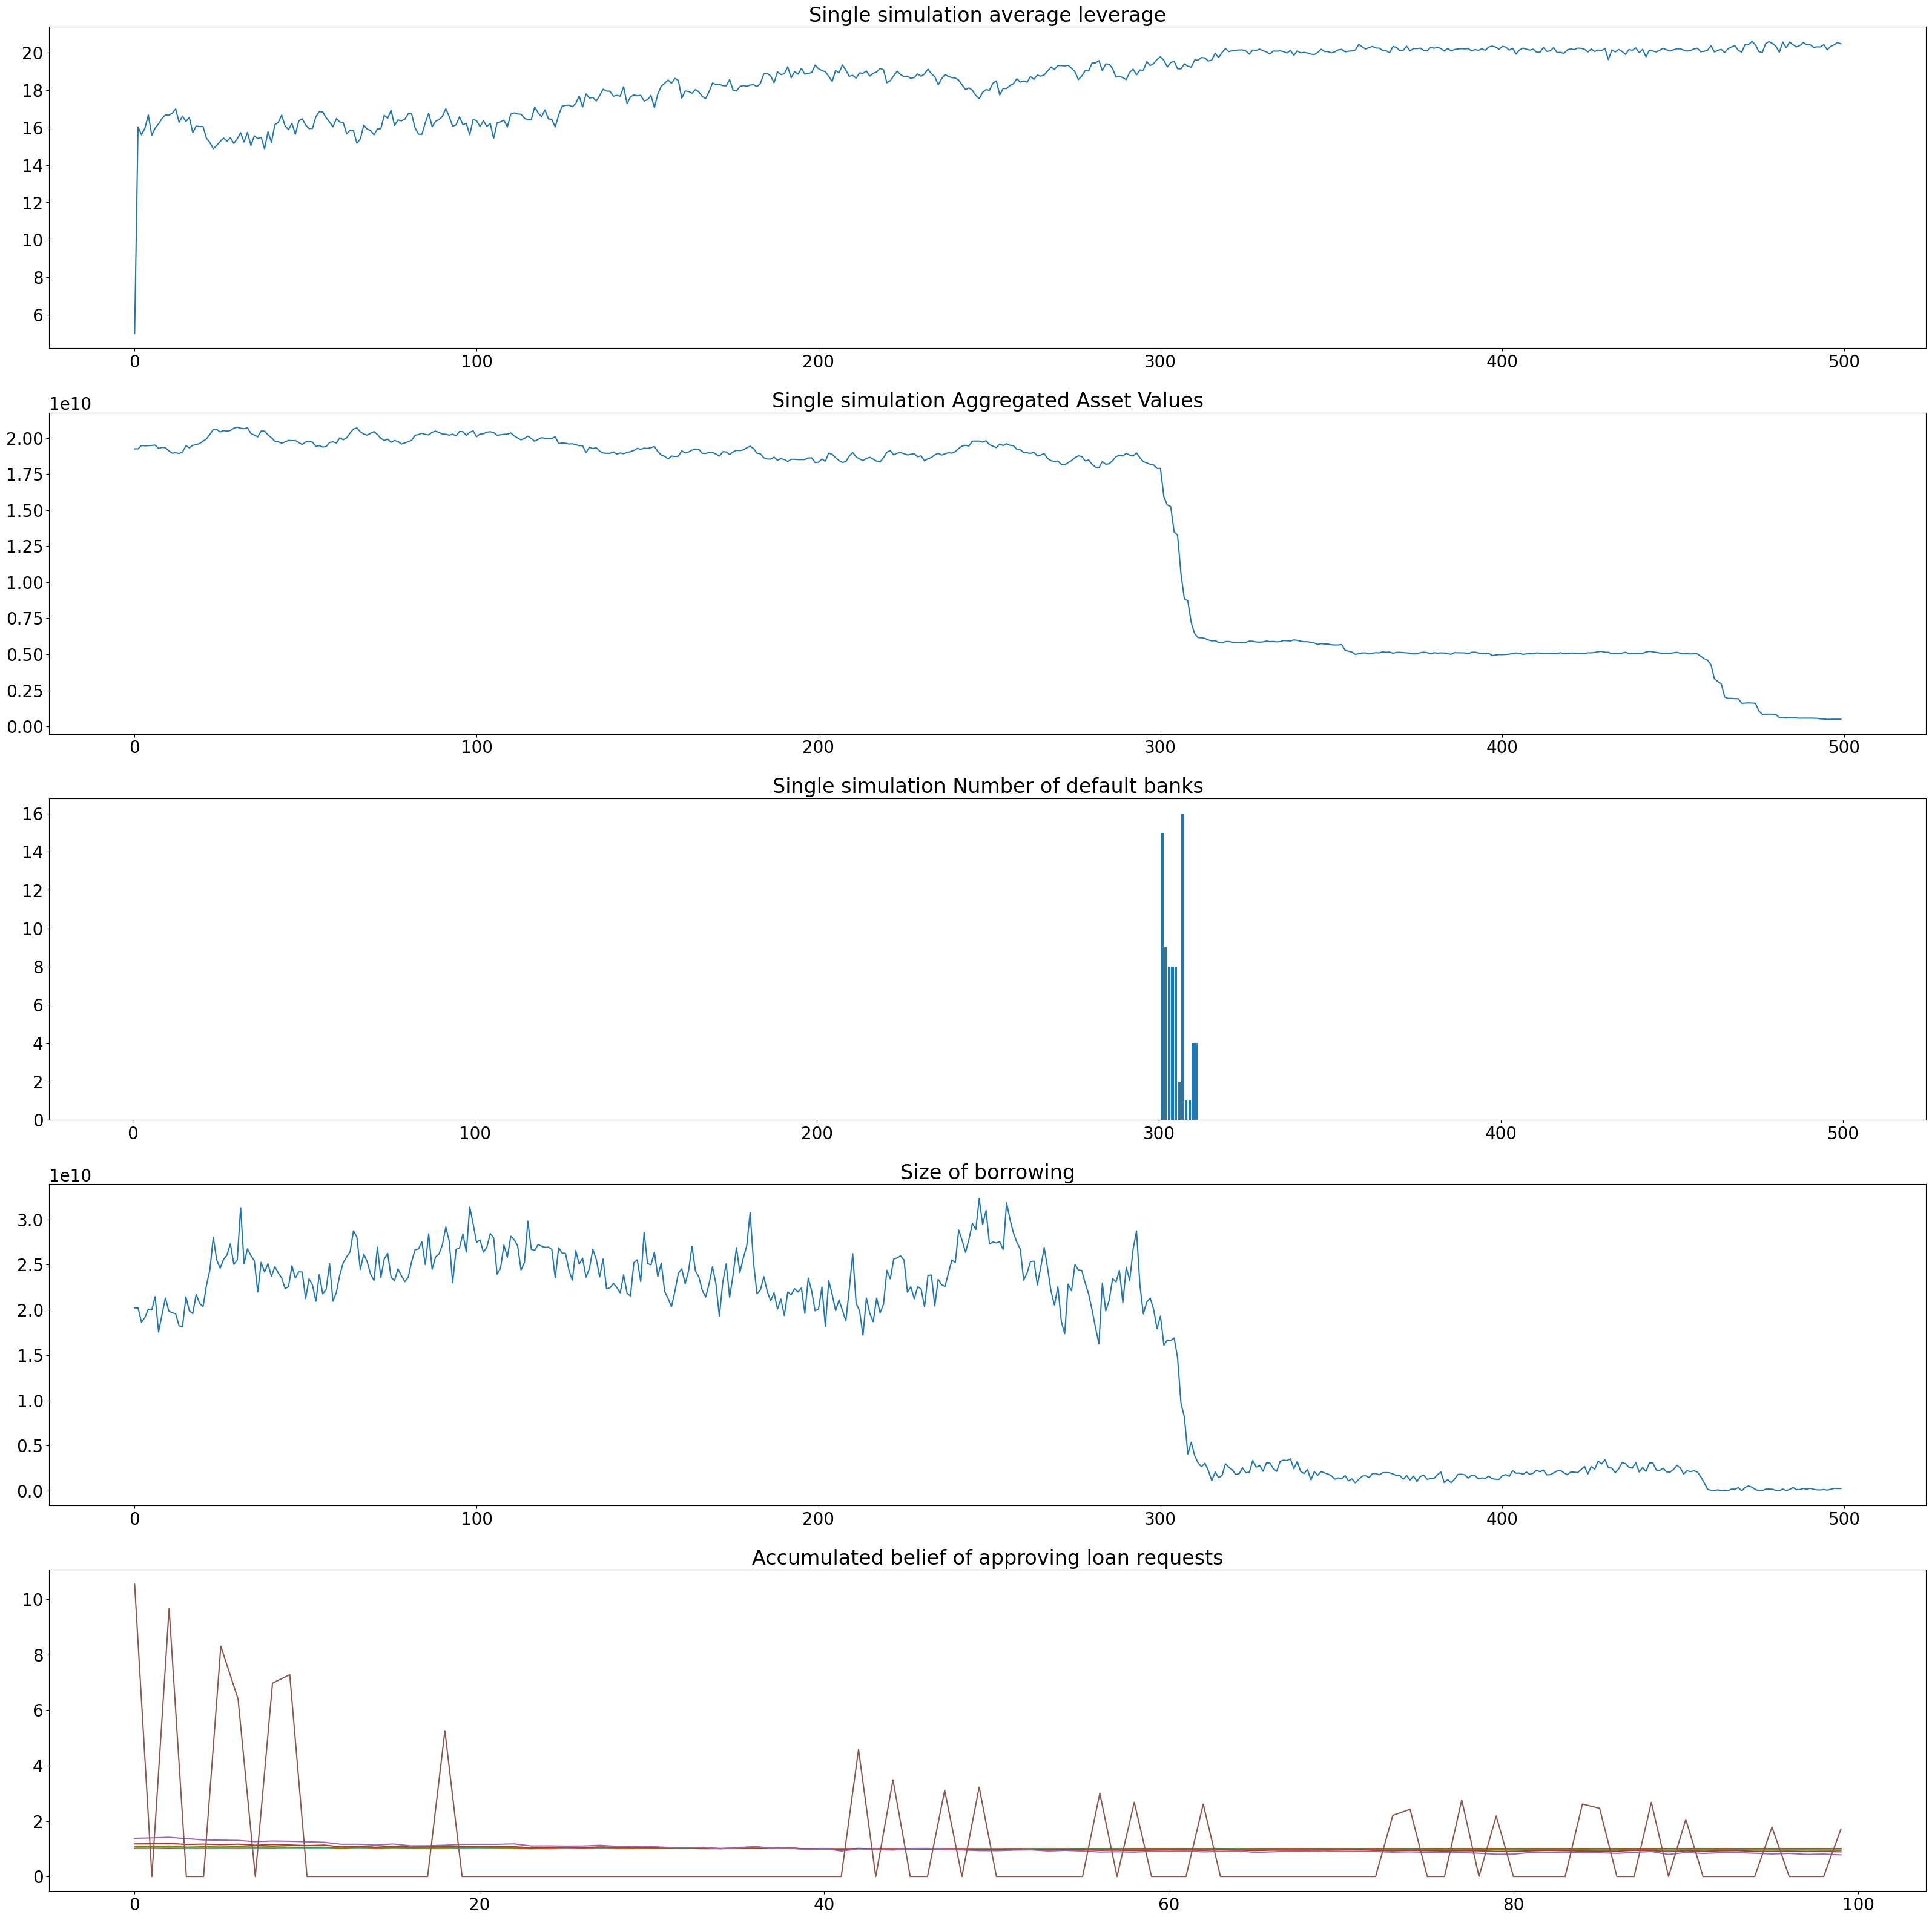

In [68]:
simulationMonitor(agent_data, model_data, simulationSteps)

In [ ]:
def run():
# simulation and data collection
    simulationSteps = 500
    cMatrix = np.diag(np.ones(100)) + np.ones((100,100))*0.1
    np.fill_diagonal(cMatrix, 1)
    model = bankingSystem(banksFile="balanceSheetAnalysis/banksData_2022.csv", # csv file used to initialize the bank agents
                    leverageRatio = 10.0,                                     # leverage ratio upper bound for all banks
                    depositReserve = 0.20,                                     # capital reserve as a ratio of portfolio value
                    num_borrowing= 20,                                        # number of borrowing request per bank per step
                    sizeOfBorrowing = 1.0/2,                                      # size of borrowing as a ratio of equity capital
                    num_banks=100,                                            # number of banks in the system 
                    alpha = 0.5,                                              # portfolio recovery rate                           
                    beta = 0.9,                                               # interbank loan recovery rate
                    fedRate = 0.04,                                            # interest rate on borrowing   
                    portfolioReturnRate = 0.10,          
                    # return rate on portfolio
                    returnVolatiliy = 0.18,
                    returnCorrelation = cMatrix,
                    liquidityShockNum = 1,                                    # number of liquidity shocks per step      
                    shockSize = 0.0,                                          # size of the shock
                    shockDuration = [300, 305]) # duration of the shock
                    
    model.datacollector.collect(model)
    for i in tqdm(range(simulationSteps)):
        model.simulate()
        
    agent_data = model.datacollector.get_agent_vars_dataframe()
    model_data = model.datacollector.get_model_vars_dataframe()
    return model_data, agent_data

for iter in range(10):
    m, a = run()
    a.Default = a.Default.map({True: 1, False: 0})
    if iter == 0:
        model_data = m
        agent_data = a
    else:
        model_data += m
        agent_data += a

model_data = model_data/10
agent_data = agent_data/10

100%|██████████| 500/500 [00:33<00:00, 15.04it/s]


In [ ]:
# bar chart of portfolio value
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(20, 10)
ax1.bar(range(100), model_data["Trust Matrix"][simulationSteps].sum(axis = 0))
ax1.set_title("Accumulated belief for every banks")
ax2.bar(range(100), agent_data.xs(0, level="Step")["Equity"])
ax2.set_title("Equity value for every banks")
plt.show()

NameError: name 'plt' is not defined